In [50]:
%reset -f
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
import numpy as np
from viz import draw_dot

In [57]:
class Value:

    def __init__(self, data, children=(), _op='', label='') -> None:
        """
        data (float): the scalar value of the node.
        children (tuple): a tuple containing all children we used in finding data.
        """
        self.data = data
        self.grad = 0
        self._prev = set(children)
        self._op = _op
        self.label = label

    def __repr__(self) -> str:
        return f"Value(data={self.data})"

    def __add__(self, other):
        return Value(data=self.data + other.data, children=(self, other), _op='+')

    def __mul__(self, other):
        return Value(self.data * other.data, children=(self, other), _op='*')

    def tanh(self):
        return Value(data=np.tanh(self.data), children=(self, ), _op='tanh')



In [61]:
a = Value(2, label='a')
b = Value(3, label='b')
c = a + b; c.label='c'
d = Value(0.2, label='d')
e = d * c; e.label = 'e'
L = e.tanh(); L.label='L'

a, b, c, d, e, L

(Value(data=2),
 Value(data=3),
 Value(data=5),
 Value(data=0.2),
 Value(data=1.0),
 Value(data=0.7615941559557649))

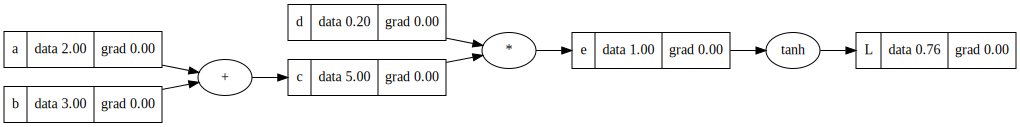

In [62]:
draw_dot(L)